# Lab 3 - Data Handling & Logistic Regression

In this lab session, we will explore different methods for data handling that are required in any machine learning pipeline.  
We will also provide a quick overview of the Logistic Regression interface using sklearn.

Materials for the logistic regression:
- Chapter 4 (Sections 4.1, 4.2, 4.3, and 4.7 lab) of the **"An Introduction to Statistical Learning"** book.

For additional information about the lab's structure, please refer to the course's [lab description file](https://github.com/olethrosdc/machine-learning-MSc/blob/main/lab.md).

# Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn

# Load Data

In this lab, we will perform data cleaning and preprocessing steps using the data collected during the first course session.

In [2]:
# get and clean train dataset
TRAIN_DATA_PATH = "class_2.csv"
org_data = pd.read_csv(TRAIN_DATA_PATH)

In [3]:
org_data.head()

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,AI,m,178,80,48.00,Brown,Greece,7.0,Married,...,1,0.0,0,0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,Maths,m,177,?,23,Brown,Swiss,12.0,Single,...,0,0.0,0,0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,-,m,178,60,28,Brown,Cuban,5.0,married,...,0,0.0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,Data science,f,172,70,24,blue,Swiss,5.0,Single,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,Procrastination,M,177,63,25,Blue,Swiss,10.0,Single,...,0,1.0,0,0,0.0,1.0,1.0,1.0,0.0,1.0


In [4]:
print("Data shape:", org_data.shape)

Data shape: (18, 28)


In [5]:
org_data.dtypes

Name                     object
Specialisation           object
Sex                      object
Height (cm)               int64
Weight (kg)              object
Age                      object
Eye Color                object
Citiizenship             object
Exercise (h/week)       float64
Marital Status           object
Children                  int64
Siblings                float64
Alcohol (u/week)        float64
Smoking (u/day)         float64
Reading (0/1)           float64
TV (0/1)                 object
Music (listening)       float64
Music (Playing)         float64
Writing (0/1)            object
Football (0/1)          float64
Basketball (0/1)         object
Tennis (0/1)             object
Swimming  (0/1)         float64
Running (0/1)           float64
Mountain Sport (0/1)    float64
Biking (0/1)            float64
Weights (0/1)           float64
Other (0/1)             float64
dtype: object

# Data Cleaning & Preprocessing

**Data cleaning** refers specifically to the process of identifying and addressing inconsistencies, errors in the dataset. This can involve different data quality issues that depends on the application.

1. **unify different data representation**: 
    1. Convert data in the same units.
    2. Resolve incostistencies regarding categorical data
    3. Correct typos


**Data preprocessing** , on the other hand, refers to a set of techniques used to transform your data into a format suitable for analysis. It is a crucial step in the data analysis pipeline and plays a significant role in ensuring the quality, accuracy, and reliability of the data used for decision-making and modeling.

Some of the most common issues that we need to address during data preprocessing include:

1. **Handling Missing Values**:
   - Many real-life datasets contain missing values in various features. Most machine learning algorithms can't handle missing information, so we often have to decide whether to drop the missing values or replace them with specific values.

2. **Dealing with Categorical Features**:
   - Numerous datasets include categorical features that must be transformed into numerical values for compatibility with machine learning algorithms. Various techniques, such as one-hot encoding or label encoding, can be used for this purpose.

3. **Outlier Detection**:
   - Outliers can significantly impact the training of machine learning models. For example, having an age value of over 200 is likely an error. We must identify and remove such outliers to improve model performance.

It's important to note that different machine learning experiments may require different approaches to handle data preprocessing, while data cleaning processes usually remain consistent. Addressing both data cleaning and preprocessing tasks effectively is essential to prepare the data for modeling and ensure that our machine learning models can perform optimally.


# Explore Your Data

One of the initial steps in data cleaning is to visualize your dataset to gain a quick understanding of its major issues.

In [6]:
org_data.head(18)

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,AI,m,178,80,48.00,Brown,Greece,7.0,Married,...,1,0.0,0,0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,Maths,m,177,?,23,Brown,Swiss,12.0,Single,...,0,0.0,0,0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,-,m,178,60,28,Brown,Cuban,5.0,married,...,0,0.0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,Data science,f,172,70,24,blue,Swiss,5.0,Single,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,Procrastination,M,177,63,25,Blue,Swiss,10.0,Single,...,0,1.0,0,0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,Maths,?,178,69,28,Blue,Swiss,7.0,Single,...,0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,Data science,M,178,82,23,Black,Indian,NaN,Single,...,?,1.0,0,0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,Data science,M,175,78,23,Brown,Bangladeshi,4.0,Single,...,1,0.0,0,0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,Business Informatics,f,168,61,24,blue,Swiss,5.0,not married,...,0,0.0,0,0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,Geography,m,180,70,26,blue,Swiss,6.0,Single,...,0,1.0,0,-,0.0,1.0,1.0,0.0,0.0,0.0


To identify inconsistencies in our data, we can examine the unique values of each column.

In [7]:
org_data["Sex"].unique()

array(['m', 'f', 'M', '?', 'male', 'Male'], dtype=object)

## List of Problems

1. **Missing Values:**
   - There are missing values present in the dataset that need to be addressed.

2. **Inconsistent Missing Value Indicators:**
   - Missing values are indicated using different symbols such as "?," "-," and "" (empty string). It's important to standardize how missing values are represented.

3. **Inconsistent Categorical Values:**
   - In the 'sex' feature, there are different values that essentially represent the same category, such as "Male," "m," and "M." Standardizing these values is necessary for data consistency.
   
4. **Outliers:**
   - Some columns has some outliers that we can remove. For example the "Procrastination" Specialisation seems to be an outlier that we have to remove.
   
In general, you may discover more issues with your dataset as you work on it.

## 1. Data Cleaning

#### fix Inconsistent Missing Value Indicators
To fix the "Inconsistent Missing Value Indicators" we can spesify the missing value indicator using the pd.read_csv method as bellow. 

In [8]:
data = pd.read_csv(TRAIN_DATA_PATH,
                   na_values = ["?","-",""]) # as an alternative you have replace ["?","-",""] with np.nan 

In [9]:
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,AI,m,178,80.0,48.0,Brown,Greece,7.0,Married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,Maths,m,177,NaN,23.0,Brown,Swiss,12.0,Single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60.0,28.0,Brown,Cuban,5.0,married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,Data science,f,172,70.0,24.0,blue,Swiss,5.0,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,Procrastination,M,177,63.0,25.0,Blue,Swiss,10.0,Single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,Maths,NaN,178,69.0,28.0,Blue,Swiss,7.0,Single,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,Data science,M,178,82.0,23.0,Black,Indian,NaN,Single,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,Data science,M,175,78.0,23.0,Brown,Bangladeshi,4.0,Single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,Business Informatics,f,168,61.0,24.0,blue,Swiss,5.0,not married,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,Geography,m,180,70.0,26.0,blue,Swiss,6.0,Single,...,0.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


In [10]:
org_data.replace({"?":np.nan,
                  "-":np.nan,
                  "":np.nan})

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,AI,m,178,80,48.00,Brown,Greece,7.0,Married,...,1,0.0,0,0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,Maths,m,177,NaN,23,Brown,Swiss,12.0,Single,...,0,0.0,0,0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60,28,Brown,Cuban,5.0,married,...,0,0.0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,Data science,f,172,70,24,blue,Swiss,5.0,Single,...,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,Procrastination,M,177,63,25,Blue,Swiss,10.0,Single,...,0,1.0,0,0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,Maths,NaN,178,69,28,Blue,Swiss,7.0,Single,...,0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,Data science,M,178,82,23,Black,Indian,NaN,Single,...,NaN,1.0,0,0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,Data science,M,175,78,23,Brown,Bangladeshi,4.0,Single,...,1,0.0,0,0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,Business Informatics,f,168,61,24,blue,Swiss,5.0,not married,...,0,0.0,0,0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,Geography,m,180,70,26,blue,Swiss,6.0,Single,...,0,1.0,0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


#### handle Inconsistent Categorical Values
To handle categorical incosistent values are difficult and is depends on the aplication and the external infomation of our problem. For example if we have incosistency on the Citiizenship feature we can fix it or detected if we have a list of all avelable coutries. Other feature maybe more difficult as "Specialisation" that peple could write the same thing with different ways depending on the degree.

one problem that is frequenty occurs is the different capitalization of the categorical columns.

In [11]:
data['Specialisation'] = data['Specialisation'].str.lower()
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,ai,m,178,80.0,48.0,Brown,Greece,7.0,Married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,maths,m,177,NaN,23.0,Brown,Swiss,12.0,Single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60.0,28.0,Brown,Cuban,5.0,married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,data science,f,172,70.0,24.0,blue,Swiss,5.0,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,procrastination,M,177,63.0,25.0,Blue,Swiss,10.0,Single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,maths,NaN,178,69.0,28.0,Blue,Swiss,7.0,Single,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,data science,M,178,82.0,23.0,Black,Indian,NaN,Single,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,data science,M,175,78.0,23.0,Brown,Bangladeshi,4.0,Single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,business informatics,f,168,61.0,24.0,blue,Swiss,5.0,not married,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,geography,m,180,70.0,26.0,blue,Swiss,6.0,Single,...,0.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


we can do the same for every column that has categorical values.

In [12]:
categorical_fetures = ["Name","Specialisation","Sex","Eye Color","Citiizenship","Marital Status"]
for feature in categorical_fetures:
    data[feature] = data[feature].str.lower()

In [13]:
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,ai,m,178,80.0,48.0,brown,greece,7.0,married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,maths,m,177,NaN,23.0,brown,swiss,12.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60.0,28.0,brown,cuban,5.0,married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,data science,f,172,70.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,procrastination,m,177,63.0,25.0,blue,swiss,10.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,maths,NaN,178,69.0,28.0,blue,swiss,7.0,single,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,data science,m,178,82.0,23.0,black,indian,NaN,single,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,data science,m,175,78.0,23.0,brown,bangladeshi,4.0,single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,business informatics,f,168,61.0,24.0,blue,swiss,5.0,not married,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,geography,m,180,70.0,26.0,blue,swiss,6.0,single,...,0.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


after converting the categorical values in lower case we can see the different values of each feature.

In [14]:
data["Specialisation"].unique()

array(['ai', 'maths', nan, 'data science', 'procrastination',
       'business informatics', 'geography', 'business it', 'statistics',
       'logic'], dtype=object)

then we can create a mapping to group similar categorical values as in the following example.

In [15]:
fix_categorical_Specialisation = {"ai":"data science",
                                  "statistics":"maths",
                                  "logic":"maths",
                                  'business informatics': 'business it',
                                  "procrastination":np.nan} # replace outlier with nan

In [16]:
data["Specialisation"] = data["Specialisation"].replace(fix_categorical_Specialisation)

In [17]:
data["Specialisation"].unique()

array(['data science', 'maths', nan, 'business it', 'geography'],
      dtype=object)

we can do the same for every feature of our interest.

In [18]:
fix_categorical_marital_status = {"not married":"single"}
fix_categorical_sex = {"male":"m"}

In [19]:
data["Marital Status"] = data["Marital Status"].replace(fix_categorical_marital_status)
data["Sex"] = data["Sex"].replace(fix_categorical_sex)

In [20]:
data["Marital Status"].unique()

array(['married', 'single'], dtype=object)

In [21]:
data["Sex"].unique()

array(['m', 'f', nan], dtype=object)

In [22]:
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,data science,m,178,80.0,48.0,brown,greece,7.0,married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,maths,m,177,NaN,23.0,brown,swiss,12.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60.0,28.0,brown,cuban,5.0,married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,data science,f,172,70.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,NaN,m,177,63.0,25.0,blue,swiss,10.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,maths,NaN,178,69.0,28.0,blue,swiss,7.0,single,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,data science,m,178,82.0,23.0,black,indian,NaN,single,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,data science,m,175,78.0,23.0,brown,bangladeshi,4.0,single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,business it,f,168,61.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,geography,m,180,70.0,26.0,blue,swiss,6.0,single,...,0.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


##  2. Data Preprocessing

## A. Handling Missing Values

Missing values in a dataset can be managed using various techniques, including:

- **Dropping Missing Values**: This involves removing rows or columns with missing values. While it simplifies the dataset, it should be done judiciously to avoid significant data loss.

- **Imputing Missing Values**: Imputation is the process of filling in missing values with estimated or calculated values. Common imputation methods include mean, median, mode imputation for numerical data, and most frequent imputation for categorical data. [Learn more](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

- **Advanced Imputation Techniques**: Depending on the dataset's complexity, you may explore more advanced imputation techniques based on models. [Learn more](https://scikit-learn.org/stable/modules/impute.html)

It's important to choose the most appropriate method based on the nature of the missing data and the impact on your analysis.

As a suggestion the most safe way to fix the missing data problem is to drop the missing values.   
You have to use imputation method only if you have significant data loss comparted to the difficulty of your problem.


let's first count the number of missing values

In [23]:
data.isna() # matrix with True is the specific row column has a nan value

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False



Remember that True is equal to 1 and False is equal to 0 when doing numerical operations with boolean in python.
So the sum over the columns to get number of missing values per feature

In [24]:
data.isna().sum()

Name                    0
Specialisation          2
Sex                     1
Height (cm)             0
Weight (kg)             1
Age                     2
Eye Color               0
Citiizenship            1
Exercise (h/week)       1
Marital Status          0
Children                0
Siblings                1
Alcohol (u/week)        1
Smoking (u/day)         1
Reading (0/1)           1
TV (0/1)                1
Music (listening)       1
Music (Playing)         1
Writing (0/1)           2
Football (0/1)          1
Basketball (0/1)        2
Tennis (0/1)            2
Swimming  (0/1)         1
Running (0/1)           1
Mountain Sport (0/1)    1
Biking (0/1)            1
Weights (0/1)           2
Other (0/1)             2
dtype: int64

In [25]:
# You can take the percentage
data.isna().sum() / data.shape[0]

Name                    0.000000
Specialisation          0.111111
Sex                     0.055556
Height (cm)             0.000000
Weight (kg)             0.055556
Age                     0.111111
Eye Color               0.000000
Citiizenship            0.055556
Exercise (h/week)       0.055556
Marital Status          0.000000
Children                0.000000
Siblings                0.055556
Alcohol (u/week)        0.055556
Smoking (u/day)         0.055556
Reading (0/1)           0.055556
TV (0/1)                0.055556
Music (listening)       0.055556
Music (Playing)         0.055556
Writing (0/1)           0.111111
Football (0/1)          0.055556
Basketball (0/1)        0.111111
Tennis (0/1)            0.111111
Swimming  (0/1)         0.055556
Running (0/1)           0.055556
Mountain Sport (0/1)    0.055556
Biking (0/1)            0.055556
Weights (0/1)           0.111111
Other (0/1)             0.111111
dtype: float64

In [26]:
# You can also see the different rows that has at least one missing values
data.isna().any(axis=1)

0     False
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9      True
10    False
11    False
12     True
13     True
14     True
15    False
16     True
17    False
dtype: bool

In [27]:
# this is the number of observation we will lose if we drop the rows tha contains missing values
data.isna().any(axis=1).sum()

10

In [28]:
# percetage of missing rows
data.isna().any(axis=1).sum()/data.shape[0]

0.5555555555555556

In [29]:
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,data science,m,178,80.0,48.0,brown,greece,7.0,married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,maths,m,177,NaN,23.0,brown,swiss,12.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,student_3,NaN,m,178,60.0,28.0,brown,cuban,5.0,married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,student_4,data science,f,172,70.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,student_5,NaN,m,177,63.0,25.0,blue,swiss,10.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
5,student_6,maths,NaN,178,69.0,28.0,blue,swiss,7.0,single,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,student_7,data science,m,178,82.0,23.0,black,indian,NaN,single,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,data science,m,175,78.0,23.0,brown,bangladeshi,4.0,single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,business it,f,168,61.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,geography,m,180,70.0,26.0,blue,swiss,6.0,single,...,0.0,1.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0


### method 1. Replace missing values with some spesific value

#### example of replacing with most frequent value

In [30]:
most_freq = {}
for feature in data.columns:
    most_freq[feature] = data[feature].value_counts().idxmax()

In [31]:
most_freq

{'Name': 'student_1',
 'Specialisation': 'data science',
 'Sex': 'm',
 'Height (cm)': 178,
 'Weight (kg)': 70.0,
 'Age': 23.0,
 'Eye Color': 'brown',
 'Citiizenship': 'swiss',
 'Exercise (h/week)': 5.0,
 'Marital Status': 'single',
 'Children': 0,
 'Siblings': 2.0,
 'Alcohol (u/week)': 0.0,
 'Smoking (u/day)': 0.0,
 'Reading (0/1)': 1.0,
 'TV (0/1)': 0.0,
 'Music (listening)': 1.0,
 'Music (Playing)': 0.0,
 'Writing (0/1)': 0.0,
 'Football (0/1)': 0.0,
 'Basketball (0/1)': 0.0,
 'Tennis (0/1)': 0.0,
 'Swimming  (0/1)': 0.0,
 'Running (0/1)': 1.0,
 'Mountain Sport (0/1)': 1.0,
 'Biking (0/1)': 0.0,
 'Weights (0/1)': 0.0,
 'Other (0/1)': 0.0}

In [32]:
replace_with_mfv = ["Exercise (h/week)",
                    "Siblings",
                    "Alcohol (u/week)",
                    "Smoking (u/day)",
                    "Reading (0/1)",
                    "TV (0/1)",
                    "Music (listening)",
                    "Music (Playing)",
                    "Writing (0/1)",
                    "Football (0/1)",
                    "Basketball (0/1)",
                    "Tennis (0/1)",
                    "Swimming  (0/1)",
                    "Running (0/1)",
                    "Mountain Sport (0/1)",
                    "Biking (0/1)",
                    "Weights (0/1)",
                    "Other (0/1)"]

In [33]:
# train_mean = train_data.mean()
data[replace_with_mfv] = data[replace_with_mfv].fillna(most_freq)

In [34]:
data[replace_with_mfv].isna().sum()

Exercise (h/week)       0
Siblings                0
Alcohol (u/week)        0
Smoking (u/day)         0
Reading (0/1)           0
TV (0/1)                0
Music (listening)       0
Music (Playing)         0
Writing (0/1)           0
Football (0/1)          0
Basketball (0/1)        0
Tennis (0/1)            0
Swimming  (0/1)         0
Running (0/1)           0
Mountain Sport (0/1)    0
Biking (0/1)            0
Weights (0/1)           0
Other (0/1)             0
dtype: int64

#### example of replacing with average values

for numerical feature we can replace also with the average or other statistic like max and min value.

In [35]:
replace_with_average = ["Height (cm)",
                        "Weight (kg)",
                        "Age"]

In [36]:
mean_values = data[replace_with_average].mean()

In [37]:
data[replace_with_average] = data[replace_with_average].fillna(mean_values)

In [38]:
data[replace_with_average].isna().sum()

Height (cm)    0
Weight (kg)    0
Age            0
dtype: int64

### method 2. Drop missing values
we can drop all the rows that contains at least one missing value

In [40]:
data.isna().mean()

Name                    0.000000
Specialisation          0.111111
Sex                     0.055556
Height (cm)             0.000000
Weight (kg)             0.000000
Age                     0.000000
Eye Color               0.000000
Citiizenship            0.055556
Exercise (h/week)       0.000000
Marital Status          0.000000
Children                0.000000
Siblings                0.000000
Alcohol (u/week)        0.000000
Smoking (u/day)         0.000000
Reading (0/1)           0.000000
TV (0/1)                0.000000
Music (listening)       0.000000
Music (Playing)         0.000000
Writing (0/1)           0.000000
Football (0/1)          0.000000
Basketball (0/1)        0.000000
Tennis (0/1)            0.000000
Swimming  (0/1)         0.000000
Running (0/1)           0.000000
Mountain Sport (0/1)    0.000000
Biking (0/1)            0.000000
Weights (0/1)           0.000000
Other (0/1)             0.000000
dtype: float64

In [41]:
print("Number of example before dropping missing:", data.shape)
data = data.dropna(how="any")
print("Number of example after dropping missing:", data.shape)

Number of example before dropping missing: (18, 28)
Number of example after dropping missing: (14, 28)


In [44]:
data.isna().any().any()

False

# B. Handle categorical values

### Label Encoding

Label encoding is a technique that assigns each unique value of a categorical variable a unique integer label. For example, if you have a categorical variable for “gender” that can take on two values, male and female, you could assign male to 0 and female to 1.

Label encoding is a simple technique that can work well with some machine learning algorithms. However, it assumes an implicit ordering of the categorical values, which may not always be appropriate. For example, label encoding the “color” variable as red=0, green=1, and blue=4 implies that green is closer to red than to blue, which may not be true.



### One-Hot Encoding
This method creates binary columns for each category in the original variable, avoiding the implicit ordering assumption of label encoding. [Learn more](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


These are just a few examples of categorical encoding techniques, each with its own strengths and considerations.

### method 1. Label Encoding

In [39]:
data

,Name,Specialisation,Sex,Height (cm),Weight (kg),Age,Eye Color,Citiizenship,Exercise (h/week),Marital Status,...,Writing (0/1),Football (0/1),Basketball (0/1),Tennis (0/1),Swimming (0/1),Running (0/1),Mountain Sport (0/1),Biking (0/1),Weights (0/1),Other (0/1)
0,student_1,data science,m,178,80.0,48.0,brown,greece,7.0,married,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,student_2,maths,m,177,71.0,23.0,brown,swiss,12.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,student_4,data science,f,172,70.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,student_7,data science,m,178,82.0,23.0,black,indian,5.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,student_8,data science,m,175,78.0,23.0,brown,bangladeshi,4.0,single,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
8,student_9,business it,f,168,61.0,24.0,blue,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,student_10,geography,m,180,70.0,26.0,blue,swiss,6.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10,student_11,business it,f,155,52.0,23.0,brown,swiss,5.0,single,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11,student_12,data science,m,165,54.0,21.0,brown,france,5.0,single,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
13,student_14,data science,m,170,65.0,23.0,hazel,swiss,5.0,single,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [40]:
# example of label encoding
data["Sex"].unique().tolist()

['m', 'f']

In [41]:
replace_dict = {
    'm':0,
    'f':1,
}
data["Sex"] = data["Sex"].replace(replace_dict)

/var/folders/cr/h97h0km17v725pm92zr1lrk80000gn/T/ipykernel_17915/3280686256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"] = data["Sex"].replace(replace_dict)


In [42]:
categorical_features = ["Marital Status", "Eye Color", "Citiizenship"]

rename_dictionaries = {}
for feature in categorical_features:
    unique_values = data[feature].unique()
    rename_dict = {value:i for i,value in enumerate(unique_values)}
    rename_dictionaries[feature] = rename_dict

In [43]:
rename_dictionaries["Specialisation"]

{'data science': 0, 'maths': 1, 'business it': 2, 'geography': 3}

In [44]:
data = data.replace(rename_dictionaries)

### method 2. One hot encoding
some time when numerical representation dosent make sense to be handle by the algorithm we can create one hot vector for each feature.

In [45]:
pd.get_dummies(data["Specialisation"], sparse=True)

,business it,data science,geography,maths
0,0,1,0,0
1,0,0,0,1
3,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,1,0,0,0
9,0,0,1,0
10,1,0,0,0
11,0,1,0,0
13,0,1,0,0


In [46]:
data[["married","single"]] = pd.get_dummies(data["Marital Status"], sparse=True)

In [47]:
data = data.drop("Marital Status",axis=1)

In [48]:
data.columns

Index(['Name', 'Specialisation', 'Sex', 'Height (cm)', 'Weight (kg)', 'Age',
       'Eye Color', 'Citiizenship', 'Exercise (h/week)', 'Children',
       'Siblings', 'Alcohol (u/week)', 'Smoking (u/day)', 'Reading (0/1)',
       'TV (0/1)', 'Music (listening)', 'Music (Playing)', 'Writing (0/1)',
       'Football (0/1)', 'Basketball (0/1)', 'Tennis (0/1)', 'Swimming  (0/1)',
       'Running (0/1)', 'Mountain Sport (0/1)', 'Biking (0/1)',
       'Weights (0/1)', 'Other (0/1)', 'married', 'single'],
      dtype='object')

### Modeling
As an example we will try to make a classifier that predict if a particular individual playing football or not based on the Height and weight of the person

In [46]:
import seaborn as sns

<AxesSubplot: xlabel='Weight (kg)', ylabel='Height (cm)'>

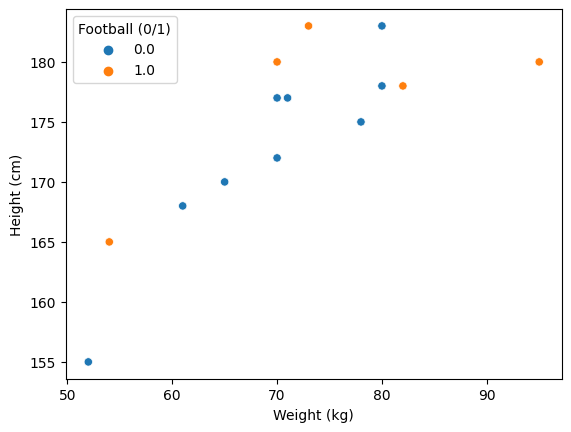

In [47]:
sns.scatterplot(data = data , x= "Weight (kg)", y = "Height (cm)",hue = "Football (0/1)")

In [51]:
data.shape

(14, 29)

In [52]:
10/14

0.7142857142857143

# Logistic Regression

Logistic Regression is a popular linear model for classification. 
It employs a linear decision boundary to separate the classes different classes.


## Mathematical Representation

In logistic regression, we start with a linear equation that combines the input features:

$$
z = \beta + w_1x_1 + w_2x_2 + \ldots + w_px_p
$$

Where:
- $z$ is the log-odds (logit) of the probability of the positive class.
- $\beta$ is the intercept or bias term.
- $(w_1, w_2, \ldots, w_p)$ are the coefficients (weights) associated with each input feature \(x_1, x_2, \ldots, x_p\).

We then apply the logistic (sigmoid) function to \(z\) to obtain the predicted probability \(p\):

$$
p = \frac{1}{1 + e^{-z}}
$$


## Model Training

The goal of logistic regression is to find the optimal values for the coefficients $(\beta, w_1, w_2, \ldots, w_p)$ that best fit the training data. This is typically done using techniques like maximum likelihood estimation or gradient descent.

In [48]:
from sklearn.linear_model import LogisticRegression
features = ["Weight (kg)","Height (cm)"]
target = "Football (0/1)"
logistic_regression = LogisticRegression(penalty = None, fit_intercept=True)
logistic_regression.fit(X=data[features], y=data[target])

LogisticRegression(penalty=None)

In [49]:
predictions = logistic_regression.predict(data[features])
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])

In [50]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_true = data[target],
                             y_pred = predictions)

print(f"Accuracy Score: {train_score*100}%")

Accuracy Score: 64.28571428571429%


In [51]:
predicted_proba = logistic_regression.predict_proba(data[features])
predicted_proba

array([[0.58079784, 0.41920216],
       [0.6002525 , 0.3997475 ],
       [0.71517613, 0.28482387],
       [0.58203463, 0.41796537],
       [0.65271084, 0.34728916],
       [0.78770295, 0.21229705],
       [0.5234746 , 0.4765254 ],
       [0.9328702 , 0.0671298 ],
       [0.83248703, 0.16751297],
       [0.75299048, 0.24700952],
       [0.44808315, 0.55191685],
       [0.53929157, 0.46070843],
       [0.59964265, 0.40035735],
       [0.4524858 , 0.5475142 ]])

In [52]:
w = logistic_regression.coef_
w

array([[-0.00254094,  0.1033363 ]])

In [53]:
b = logistic_regression.intercept_
b

array([-18.5166349])